# Part 1 - Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression

from modules.stock import Stock
from modules.portfolio import Portfolio
from modules.performance import Performance, CollectPerformance
from modules.cleandata import CleanData
from modules.fourfactormodel import FourFactorModel
from modules.fourfactorplotter import four_factor_plotter

%matplotlib inline 

# Preparation

In [2]:
stock = Stock()

# Question 1.1 - 1.2

### bmit

In [3]:
s, d = stock.portfolio(kpi='bmit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p0 = perf.get_performance('bmit high')

In [4]:
s, d = stock.portfolio(kpi='bmit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p1 = perf.get_performance('bmit low')

In [5]:
s, d = stock.portfolio(kpi='bmit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d, sum_of_weights=2)
p2 =perf.get_performance('bmit highlow')

### momit

In [6]:
s, d = stock.portfolio(kpi='momit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p3 = perf.get_performance('momit high')

In [7]:
s, d = stock.portfolio(kpi='momit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p4 = perf.get_performance('momit low')

In [8]:
s, d = stock.portfolio(kpi='momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d, sum_of_weights=2)
p5 = perf.get_performance('momit high/low')

In [9]:
q1_perf = CollectPerformance([p0, p1, p2, p3, p4, p5])
q1_perf()

,avg months for stock,avg return,sharpe ratio,std. deviation,t-stat
index_name,,,,,
bmit high,24.552786,0.085271,0.519232,0.164225,11.863051
bmit low,24.552786,0.054189,0.265777,0.203888,6.072289
bmit highlow,49.105572,0.031082,0.180977,0.171747,4.134848
momit high,24.552786,0.098987,0.495019,0.199966,11.309850
momit low,24.552786,0.049807,0.236453,0.210641,5.402317
momit high/low,49.105572,0.049180,0.243627,0.201866,5.566228


# Question 1.3

In [10]:
stock.composite_data('bmit', 'momit')

In [11]:
s= stock.portfolio(kpi='bmit_momit', highlow='high')
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12)
p0 = perf.get_performance('composite high')

In [12]:
s = stock.portfolio(kpi='bmit_momit', highlow='low')
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12)
p1 = perf.get_performance('composite low')

In [13]:
s= stock.portfolio(kpi='bmit_momit', highlow='highlow')
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, sum_of_weights=2)
p2 = perf.get_performance('composite high/low')

In [14]:
sb = stock.portfolio(kpi='bmit', highlow='highlow')
sm = stock.portfolio(kpi='momit', highlow='highlow')
pb = Portfolio.portfolio_return(sb)
pm = Portfolio.portfolio_return(sm)
p = Portfolio.fifty_fifty(pb, pm)
perf = Performance(p, 12, sum_of_weights=2)
p3 = perf.get_performance('fifty fifty')

In [15]:
q3_perf = CollectPerformance([p0, p1, p2, p3])
q3_perf()

,avg return,sharpe ratio,std. deviation,t-stat
index_name,,,,
composite high,0.089310,0.556989,0.160345,12.725694
composite low,0.033185,0.164571,0.201643,3.760016
composite high/low,0.056126,0.409929,0.136915,9.365785
fifty fifty,0.040131,0.467560,0.085831,10.682504


# Question 1.4

In [16]:
stock.industry_adjusted_data('bmit')
stock.industry_adjusted_data('momit')
stock.composite_data('adjusted_bmit', 'adjusted_momit')

In [17]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='high', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p0 = perf.get_performance('composite adjusted high')

In [18]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='low', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d)
p1 = perf.get_performance('composite adjusted low')

In [19]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
perf = Performance(p, 12, d, sum_of_weights=2)
p2 = perf.get_performance('composite adjusted high/low')

In [20]:
q3_perf = CollectPerformance([p0, p1, p2])
q3_perf()

,avg months for stock,avg return,sharpe ratio,std. deviation,t-stat
index_name,,,,,
composite adjusted high,24.552786,0.099110,0.586594,0.168959,13.402109
composite adjusted low,24.552786,0.045012,0.235327,0.191274,5.376589
composite adjusted high/low,49.105572,0.054098,0.576088,0.093906,13.162071


# Question 1.5

### BMIT

In [21]:
s, d = stock.portfolio(kpi='bmit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [22]:
t.regress_model(model_name = 'BMIT')
res = t.get_results()
res

,HML,MKT,SMB,WML,intercept,r2
capm,NaN,-0.127898,NaN,NaN,0.001979,0.055160
four factor,0.599177,-0.016693,-0.074844,-0.194495,0.000716,0.770335


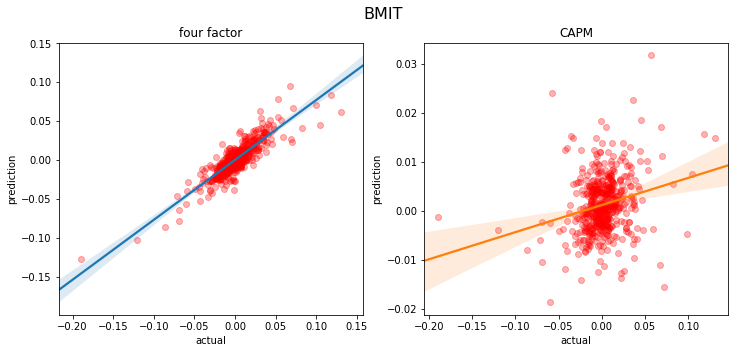

In [23]:
four_factor_plotter(t, 'BMIT', save=False)

### MOMIT

In [24]:
s, d = stock.portfolio(kpi='momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [25]:
t.regress_model(model_name = 'MOMIT')
res = t.get_results()
res

,HML,MKT,SMB,WML,intercept,r2
capm,NaN,-0.046604,NaN,NaN,0.002298,0.005301
four factor,-0.076046,-0.010208,0.139771,0.572363,-0.001892,0.809781


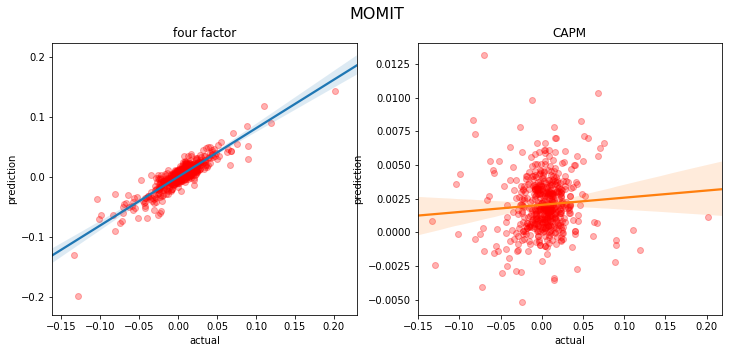

In [26]:
four_factor_plotter(t, 'MOMIT', save=False)

### Composite

In [27]:
s, d = stock.portfolio(kpi='bmit_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [33]:
t.regress_model(model_name = 'BMIT_MOMIT')
res = t.get_results()
res

,HML,MKT,SMB,WML,intercept,r2
capm,NaN,-0.069137,NaN,NaN,0.002624,0.053914
four factor,0.169831,-0.017657,0.065336,0.209426,0.000144,0.543640


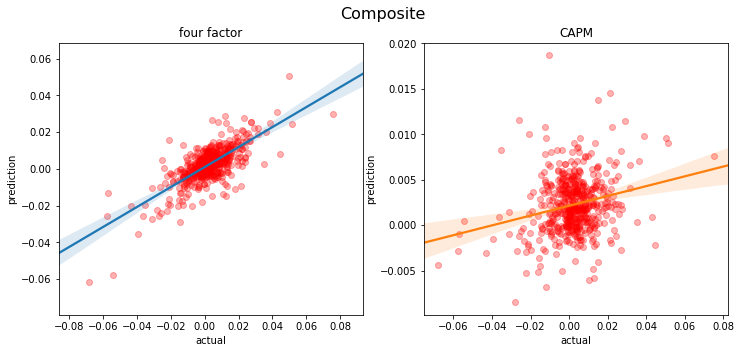

In [34]:
four_factor_plotter(t, 'Composite', save=False)

### Fifty Fifty

In [35]:
sb = stock.portfolio(kpi='bmit', highlow='highlow')
sm = stock.portfolio(kpi='momit', highlow='highlow')
pb = Portfolio.portfolio_return(sb)
pm = Portfolio.portfolio_return(sm)
p = Portfolio.fifty_fifty(pb, pm)
t = FourFactorModel(stock, p)

In [37]:
t.regress_model(model_name = 'FiftyFifty')
res = t.get_results()
res

,HML,MKT,SMB,WML,intercept,r2
capm,NaN,-0.087251,NaN,NaN,0.002139,0.102784
four factor,0.261566,-0.013451,0.032464,0.188934,-0.000588,0.724884


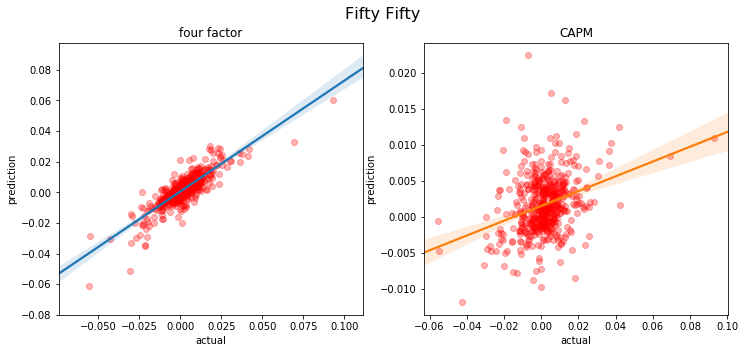

In [39]:
four_factor_plotter(t, 'Fifty Fifty', save=False)

### Industry Adjusted

In [30]:
s, d = stock.portfolio(kpi='adjusted_bmit_adjusted_momit', highlow='highlow', return_dummy=True)
p = Portfolio.portfolio_return(s)
t = FourFactorModel(stock, p)

In [31]:
t.regress_model(model_name = 'BMIT_MOMIT')
res = t.get_results()
res

,HML,MKT,SMB,WML,intercept,r2
capm,NaN,-0.069137,NaN,NaN,0.002624,0.053914
four factor,0.169831,-0.017657,0.065336,0.209426,0.000144,0.543640


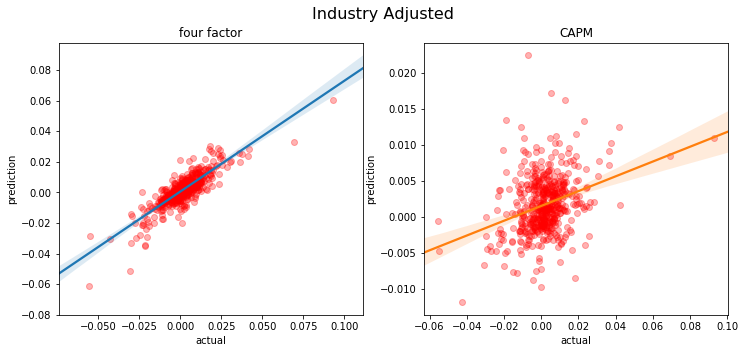

In [41]:
four_factor_plotter(t, 'Industry Adjusted', save=False)